# Implementacja kwadratury Newtona - Cotesa

# Funkcje pomocnicze

In [1]:
function mod(x)
    if x<0
        return BigFloat(-x)
    end
    return BigFloat(x)
end

mod (generic function with 1 method)

In [2]:
function silnia(k)
    if k==0
        return BigFloat(1.0)
    end
    return BigFloat(k*silnia(k-1))
end

silnia (generic function with 1 method)

### Wyzaczenie miejsc zerowych wielomianu (od 0 do n bez k)

In [3]:
#tu mam wspolczyniki do miejsc zerowych wielomianu
function wsp(k,n,K,L)
    for l=0:k-1
        K[l+1]=BigFloat(l)
    end
    for l=k+1:n
        K[l]=BigFloat(l)
    end
    for l=1:n+1
        L[l]=BigFloat(0.0)
    end
    return (K,L)
end

wsp (generic function with 1 method)

### Przejście z postaci iloczynowej do ogólnej wielomianu

In [4]:
#funkcja przechodzacaz postaci ioczynowej do ogolnej wielomianu
function wielomian(k,n)
    
    K=Array{BigFloat,1}(undef, n)#do trzymania j takich ze (x-j)
    L=Array{BigFloat,1}(undef, n+1)# do trzymania ak takich ze ak*x^k
    (K,L)=wsp(k,n,K,L)
    L[2]=BigFloat(1.0)
    L[1]=-K[1]
    for i=3:n+1
        j=i
        while j>1
            L[j]*=-K[i-1]
            L[j]+=L[j-1]
            j-=1
        end
        L[1]*=-K[i-1]
    end
    return L
end

wielomian (generic function with 1 method)

### Funkcja obliczająca $\int_{a}^{b} \! w(x) \, \mathrm{d}x$, gdzie $w=(x-1)...(x-k-1)(x-k+1)...(x-n)$

In [5]:
function calka(a,b,n,k)
    suma=BigFloat(0.0)
    L=wielomian(k,n)
    for i=1:n+1
        suma+=BigFloat(a^(i)*L[i]/(i)-b^(n)*L[i]/(n))
    end
    return suma
end

calka (generic function with 1 method)

### Obliczenie współczynników $B_k$

In [6]:
function B(k,n)
    wielomian(k,n)
    suma=BigFloat((-1)^(n-k))
    suma*=calka(BigFloat(n),0,n,k)
    suma/=n*silnia(k)*silnia(n-k)
end

B (generic function with 1 method)

### Funkcja obliczająca $\sum_{k=0}^{n} |B_k|$

In [7]:
function sumMod(n)
    suma=0.0
    suma2=0.0
    for i=0:n
        if B(i,n)<0
            @printf("Neagtive value %f, for i=%d\n", B(i,n), i)
        end
        suma+=mod(B(i,n))
        suma2+=B(i,n)
    end
    @printf("Bk sum is %f\n", suma2);
    @printf("Sum of absolute values of Bk is %f\n", suma);
end

LoadError: UndefVarError: @printf not defined

# Zadanie 4

In [8]:
sumMod(10)

UndefVarError: UndefVarError: sumMod not defined

In [9]:
sumMod(15)

UndefVarError: UndefVarError: sumMod not defined

In [10]:
sumMod(20)

UndefVarError: UndefVarError: sumMod not defined

# Zadanie 5 - przybliżanie całki $\int_{-4}^{4} \! \frac{1}{1+x^2} \, \mathrm{d}x$

In [11]:
properVal = 2*Base.atan(4)

2.651635327336065

In [12]:
function A(k,n,a,b)
    return B(k,n)*(a-b)
end

A (generic function with 1 method)

In [13]:
function f(x)
    return 1/(1+x^2)
end

f (generic function with 1 method)

In [14]:
function kwad(n)
    sum=0.0
    h=(8)/n
    for i = 0:n
        sum+=A(i,n,4,-4)*f(-4+i*h)
    end
    return sum

end

kwad (generic function with 1 method)

In [15]:
using Printf
@printf("Exact value is: %f\n", properVal);
for i in 1:5
    @printf("Value of quadrature for n = %d is: %f\n", 2*i, kwad(2*i));
    @printf("Difference for n = %d is: %f\n", 2*i, properVal-kwad(2*i));
    println("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
end

Exact value is: 2.651635
Value of quadrature for n = 2 is: 5.490196
Difference for n = 2 is: -2.838561
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Value of quadrature for n = 4 is: 2.277647
Difference for n = 4 is: 0.373988
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Value of quadrature for n = 6 is: 3.328798
Difference for n = 6 is: -0.677163
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Value of quadrature for n = 8 is: 1.941094
Difference for n = 8 is: 0.710541
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Value of quadrature for n = 10 is: 3.595560
Difference for n = 10 is: -0.943925
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


# Przyczyna zwiększania wartości różnicy całek po zwiększeniu n

### Funkcje pomocnicze

In [16]:
N=10

function mod(x)
    if x>=0
        return x
    end
    return -x
end

function W(n)
    D=Array{BigFloat,1}(undef, n+1)
    for i=1:n+1
        D[i]=-4+(8/n)*(i-1)
    end
    return D
end

function p(k,x)
    result=1
    for i=1:k-1
        result*=(x-Wezly[i])
    end
    return result
end

function bk()
    for i=1:n
        C[i]=f(Wezly[i])
    end
    for j=2:n
        k=n
        while k>=j
            C[k]=(C[k]-C[k-1])/(Wezly[k]-Wezly[k-j+1])
            k-=1
        end
    end
end

function Newton(x)
    sum=0.0
    for k=1:n
        sum+=C[k]*p(k,x)
    end
    return sum
end

Newton (generic function with 1 method)

### Wykresy

In [17]:
using Plots

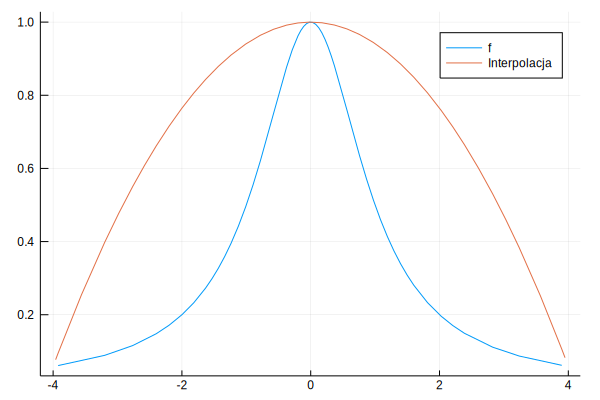

In [18]:
Wezly = W(2)
n=3
C=Array{BigFloat,1}(undef, n)
bk()
plot(f, -4, 4, label="f")
plot!(Newton, -4 ,4, label="Interpolacja")

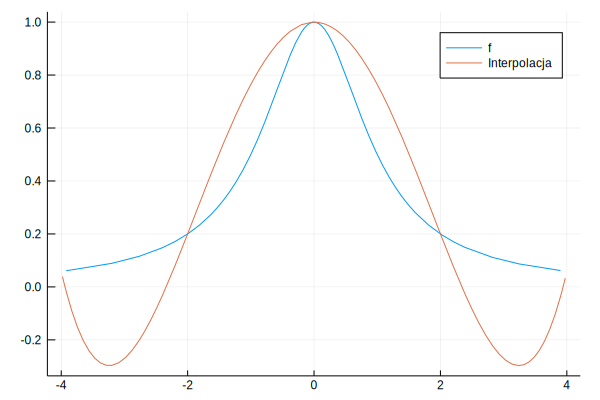

In [19]:
Wezly = W(4)
n=5
C=Array{BigFloat,1}(undef, n)
bk()
plot(f, -4, 4, label="f")
plot!(Newton, -4 ,4, label="Interpolacja")

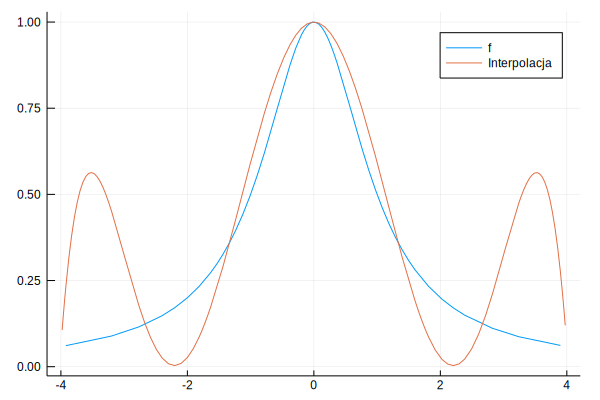

In [20]:
Wezly = W(6)
n=7
C=Array{BigFloat,1}(undef, n)
bk()
plot(f, -4, 4, label="f")
plot!(Newton, -4 ,4, label="Interpolacja")

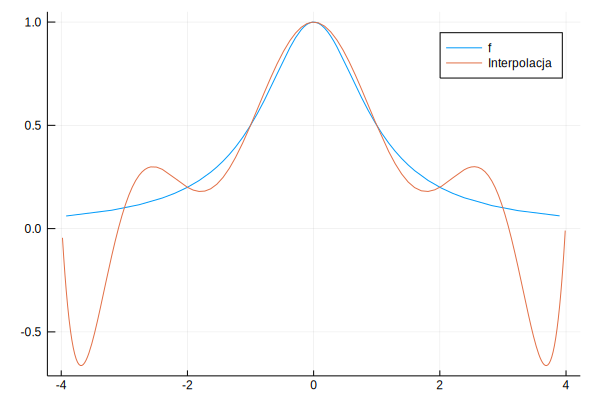

In [21]:
Wezly = W(8)
n=9
C=Array{BigFloat,1}(undef, n)
bk()
plot(f, -4, 4, label="f")
plot!(Newton, -4 ,4, label="Interpolacja")

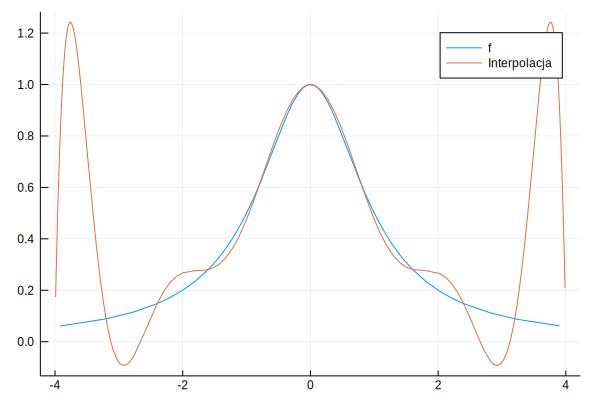

In [22]:
Wezly = W(10)
n=11
C=Array{BigFloat,1}(undef, n)
bk()
plot(f, -4, 4, label="f")
plot!(Newton, -4 ,4, label="Interpolacja")